In [1]:
from data_analysis import data_analysis

In [2]:
class project():
    def __init__(self):
        self.data = data_analysis()

    def gerar_dfnormalizado(self):
        df = self.data.read_file()
        df = self.data.log_valores(df)
        df = self.data.gerar_dummies(df) 

        self.data.plot_boxplot(df)
        self.data.plot_histograma(df)

        df = df.drop(['frequencia', 'recencia_valor', 'valor/freq'], axis=1)  
        df = df.replace({True: 1, False:0})
        return df     
    
    def gerar_indices(self):
        df = self.gerar_dfnormalizado()
        df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto = self.data.fracionar_df(df)
        # df_alimentar = self.data.indice_RFV(df_alimentar)
        # df_ecommerce = self.data.indice_RFV(df_ecommerce)
        # df_hospitalar = self.data.indice_RFV(df_hospitalar)
        # df_varejo_direto = self.data.indice_RFV(df_varejo_direto)
        # df_varejo_indireto = self.data.indice_RFV(df_varejo_indireto)
        return df, df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto

    def kmeans_run(self, df, k):
        df = self.data.kmeans_method(df, k)
        return df
    
    def plotar_3d(self, df):
        self.data.plotar_3d(df)

    def localizar_ponto(self, df, x, y, z, margem_erro):
        dataframe = df
        LogFrequencia = x
        LogRecencia = y
        LogValor = z
        margem_erro = 0.001
        ponto = dataframe[(dataframe['LogFrequencia'].apply(lambda x: abs(x - LogFrequencia) < margem_erro)) & (dataframe['LogRecencia'].apply(lambda x: abs(x - LogRecencia) < margem_erro)) & (dataframe['LogValor'].apply(lambda x: abs(x - LogValor) < margem_erro))]
        return ponto
    

In [3]:
run = project()

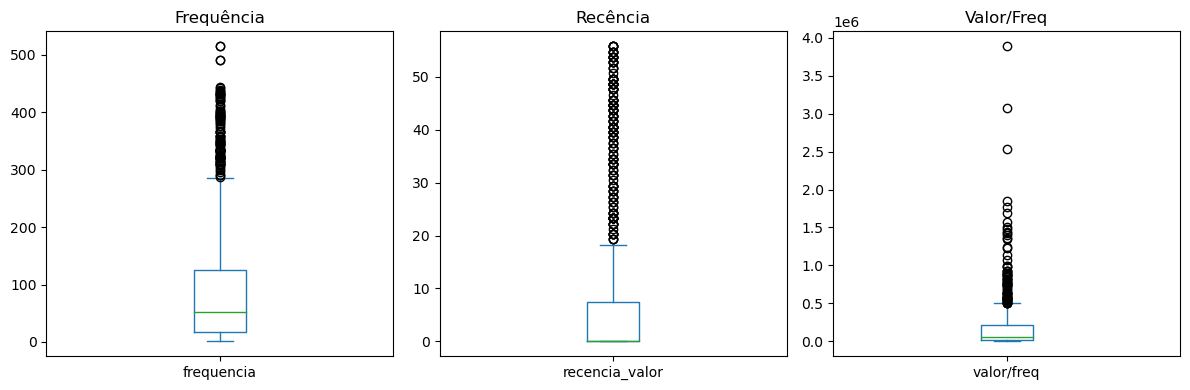

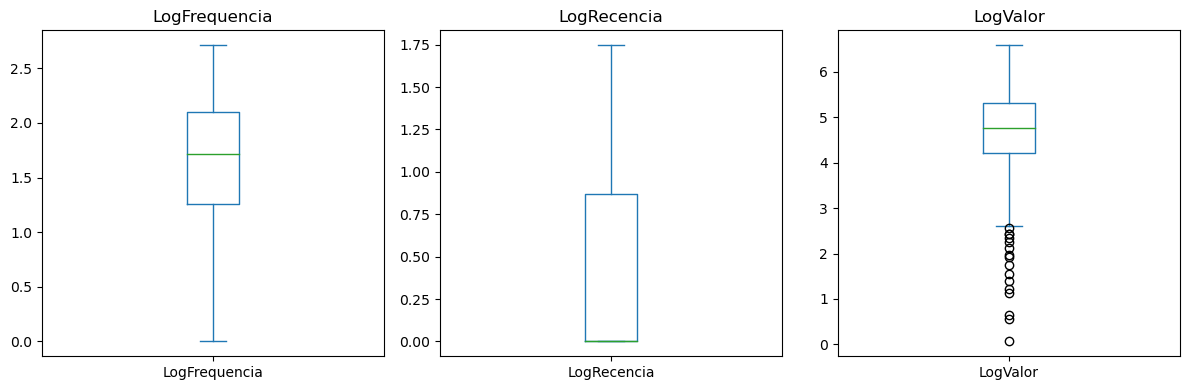

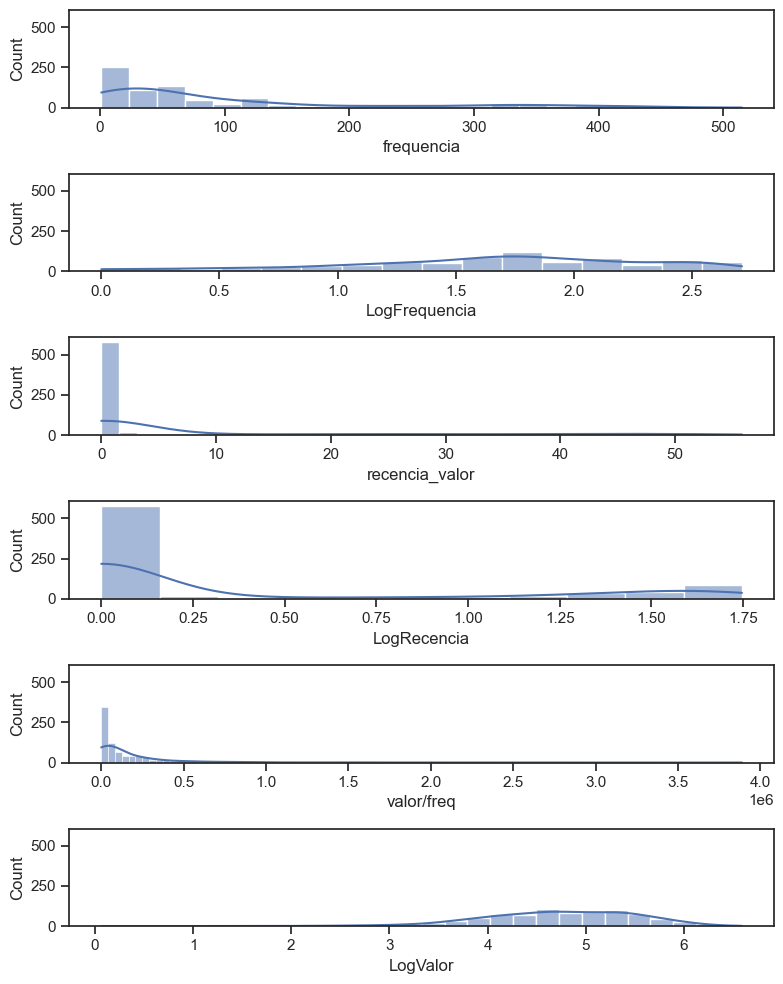

In [4]:
df, df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto = run.gerar_indices()

In [5]:
df.head()

,LogFrequencia,LogRecencia,LogValor,canal_ALIMENTAR,canal_E-COMMERCE,canal_HOSPITALAR,canal_VAREJO DIRETO,canal_VAREJO INDIRETO
rede_uf,,,,,,,,
A A AFONSO E CIA LTDA - SP,0.698970,1.537399,3.476420,1,0,0,0,0
A ANGELONI E CIA LTDA - SC,1.732394,0.000000,4.575251,1,0,0,0,0
A C D A IMPORTACAO E EXPORT LTDA - AC,1.342423,0.000000,4.059759,1,0,0,0,0
A C D A IMPORTACAO E EXPORT LTDA - RO,1.230449,0.000000,3.674251,1,0,0,0,0
A FEIRITA DISTRIBUIDORA DE PRODUTOS - BA,1.477121,0.000000,5.247718,1,0,0,0,0


Geral
        LogFrequencia                                    LogRecencia       \
                count  min      mean    median       max       count  min   
Cluster                                                                     
0                 316  0.0  1.345913  1.537773  2.562293         316  0.0   
1                 139  0.0  1.376126  1.431364  2.596597         139  0.0   
2                 260  0.0  1.954647  2.082785  2.711807         260  0.0   
3                 109  0.0  2.068668  2.389166  2.711807         109  0.0   

                                      LogValor                                \
             mean    median       max    count       min      mean    median   
Cluster                                                                        
0        0.358110  0.000000  1.738781      316  1.963396  4.566452  4.564652   
1        0.678034  0.308209  1.746894      139  1.552117  4.247393  4.220944   
2        0.368110  0.000000  1.746894      260  0.5589

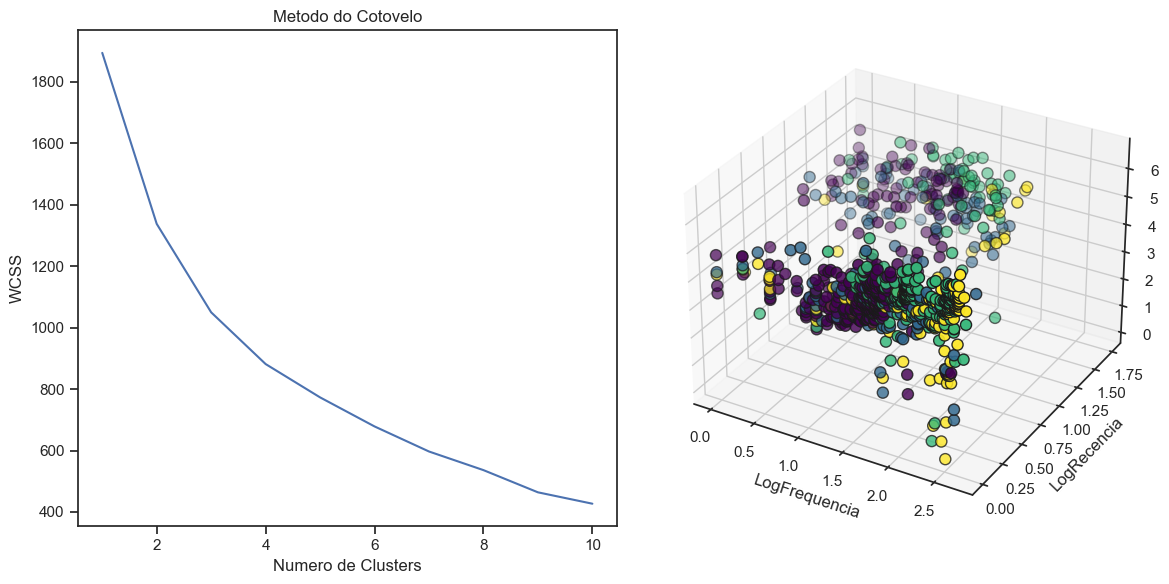

Alimentar
        LogFrequencia                                        LogRecencia       \
                count      min      mean    median       max       count  min   
Cluster                                                                         
0                  96  0.00000  1.348301  1.423169  2.562293          96  0.0   
1                  69  0.00000  0.712709  0.778151  1.518514          69  0.0   
2                 137  0.69897  1.686976  1.716003  2.107210         137  0.0   

                                      LogValor                                \
             mean    median       max    count       min      mean    median   
Cluster                                                                        
0        0.066802  0.000000  0.910269       96  1.963396  4.055629  4.151440   
1        1.453963  1.525045  1.738781       69  3.450624  4.393526  4.398855   
2        0.027125  0.000000  0.910269      137  4.448536  4.989759  4.925379   

                   
  

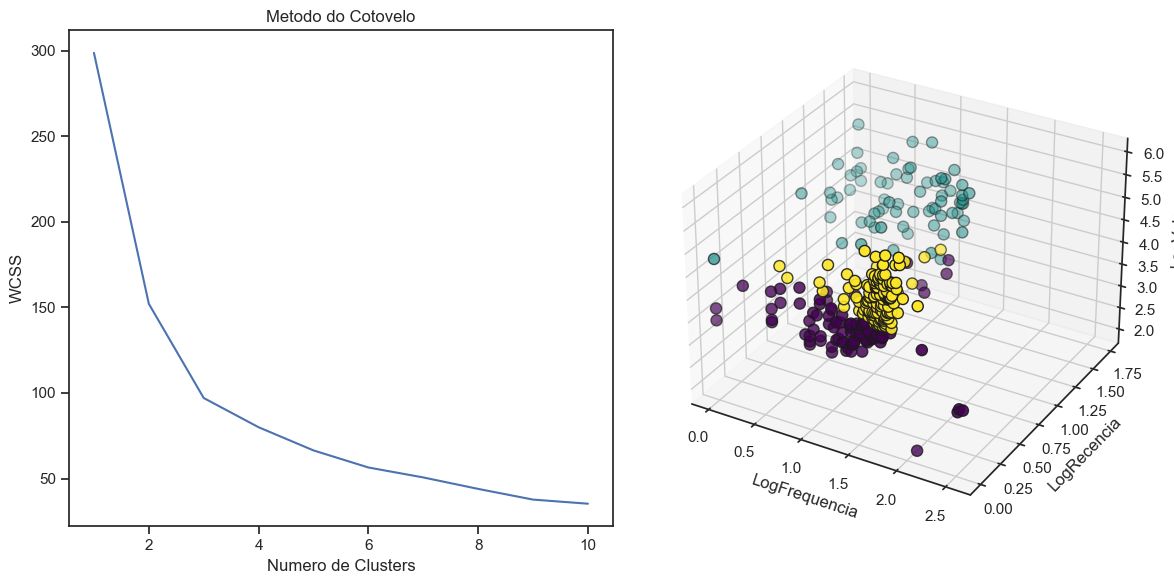

E-Commerce
        LogFrequencia                                         LogRecencia  \
                count       min      mean    median       max       count   
Cluster                                                                     
0                   3  1.113943  1.699115  1.886491  2.096910           3   
1                   5  1.255273  1.535048  1.342423  2.155336           5   
2                   6  0.301030  0.467697  0.301030  1.000000           6   

                                           LogValor                      \
         min      mean    median       max    count       min      mean   
Cluster                                                                   
0        0.0  0.203080  0.000000  0.609239        3  2.647668  3.092590   
1        0.0  0.000000  0.000000  0.000000        5  5.398994  5.540587   
2        0.0  0.350158  0.154104  1.085172        6  4.623678  4.987920   

                             
           median       max  
Cluster        

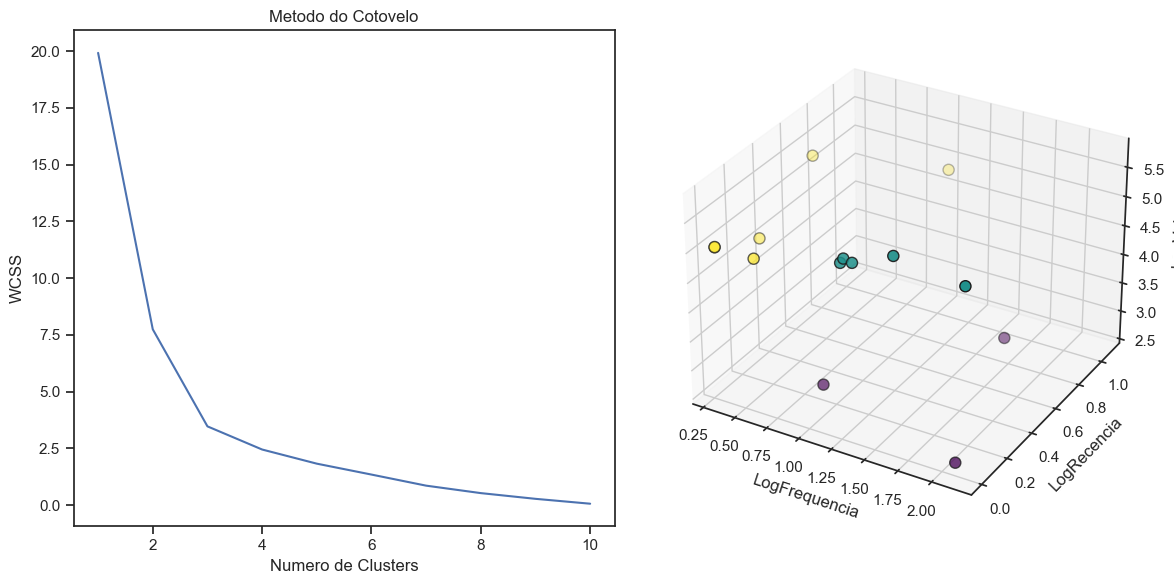

Hospitalar
        LogFrequencia                                        LogRecencia       \
                count      min      mean    median       max       count  min   
Cluster                                                                         
0                  65  0.00000  0.955096  0.954243  1.934498          65  0.0   
1                  69  0.30103  1.708159  1.812913  2.589950          69  0.0   
2                   5  1.80618  2.267457  2.506505  2.596597           5  0.0   

                                      LogValor                                \
             mean    median       max    count       min      mean    median   
Cluster                                                                        
0        1.401974  1.497851  1.746894       65  2.351708  3.953753  3.914555   
1        0.045195  0.000000  1.004321       69  3.620211  4.673920  4.697260   
2        0.000000  0.000000  0.000000        5  1.552117  2.178647  1.926236   

                   
 

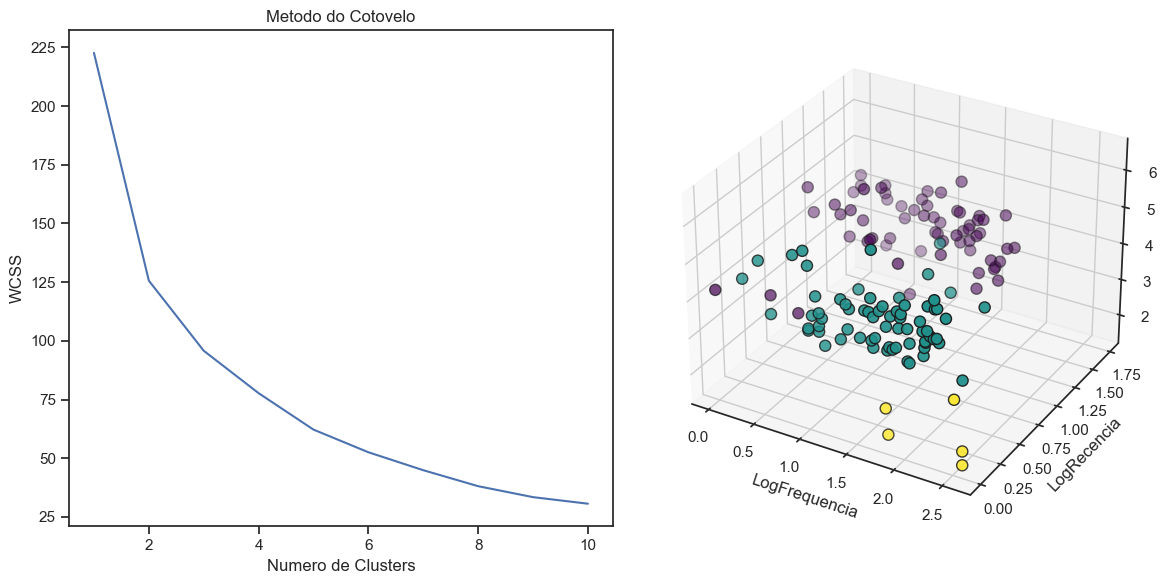

Venda Direto
        LogFrequencia                                         LogRecencia  \
                count       min      mean    median       max       count   
Cluster                                                                     
0                  63  1.643453  2.440727  2.522444  2.711807          63   
1                  14  0.000000  1.395983  1.650298  2.190332          14   
2                  32  0.000000  1.630476  1.786436  2.562293          32   

                                               LogValor                      \
             min      mean    median       max    count       min      mean   
Cluster                                                                       
0        0.00000  0.027993  0.000000  0.910269       63  3.857633  5.290624   
1        0.78533  1.435878  1.490139  1.738781       14  2.117242  4.225077   
2        0.00000  0.028670  0.000000  0.609239       32  0.064644  3.436018   

                             
           median  

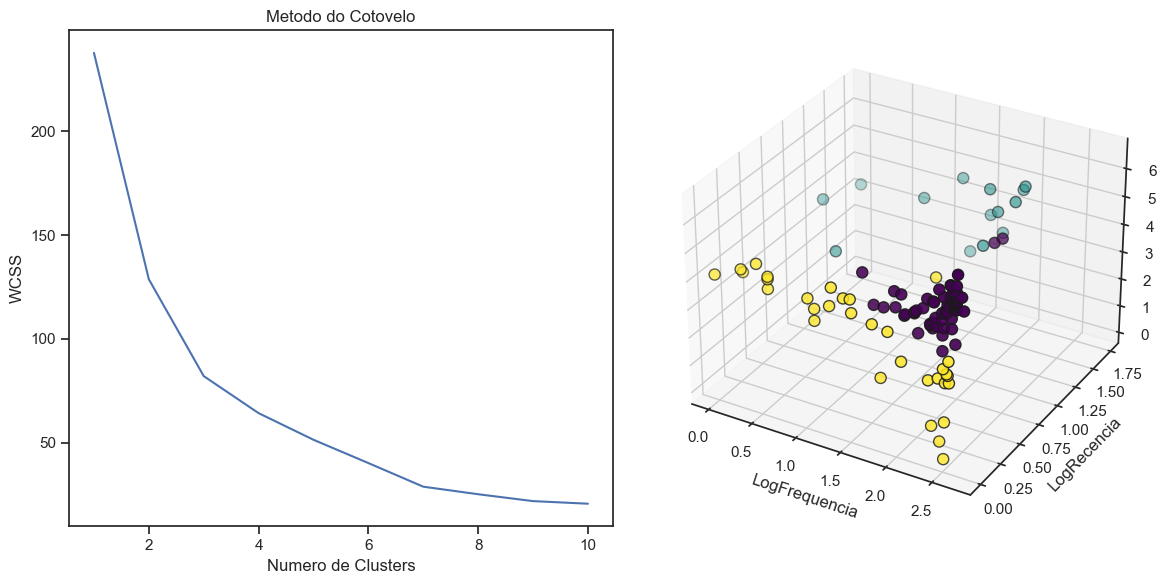

Venda Indireto
        LogFrequencia                                         LogRecencia  \
                count       min      mean    median       max       count   
Cluster                                                                     
0                  61  0.000000  1.246299  1.278754  1.968483          61   
1                 187  1.113943  2.185431  2.107210  2.711807         187   
2                  12  0.477121  1.959019  2.150493  2.690196          12   

                                           LogValor                      \
         min      mean    median       max    count       min      mean   
Cluster                                                                   
0        0.0  1.490750  1.619441  1.746894       61  2.846337  4.866495   
1        0.0  0.011986  0.000000  0.707570      187  4.168063  5.396216   
2        0.0  0.210959  0.000000  1.678215       12  0.558938  2.886739   

                             
           median       max  
Cluster    

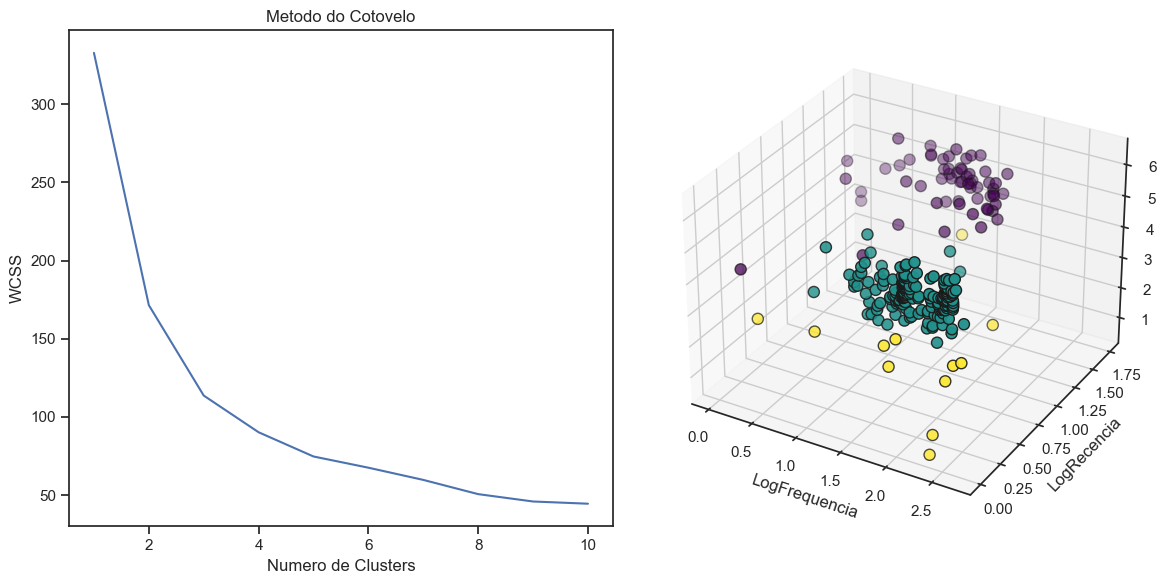

In [6]:
print("Geral")
df_kmeans = run.kmeans_run(df, 4)
print("Alimentar")
df_kmeans_a = run.kmeans_run(df_alimentar, 3)
print("E-Commerce")
df_kmeans_ec = run.kmeans_run(df_ecommerce, 3)
print("Hospitalar")
df_kmeans_hosp = run.kmeans_run(df_hospitalar, 3)
print("Venda Direto")
df_kmeans_vd = run.kmeans_run(df_varejo_direto, 3)
print("Venda Indireto")
df_kmeans_vi = run.kmeans_run(df_varejo_indireto, 3)


In [7]:
run.plotar_3d(df_kmeans_vi)

In [8]:
run.localizar_ponto(df=df_kmeans_vi, x=2.444045, y=0, z=5.34874, margem_erro=0.001)

,LogFrequencia,LogRecencia,LogValor,canal_ALIMENTAR,canal_E-COMMERCE,canal_HOSPITALAR,canal_VAREJO DIRETO,canal_VAREJO INDIRETO,Cluster
rede_uf,,,,,,,,,
PANPHARMA DIST DE MED LTDA - PE,2.444045,0.0,5.34874,0,0,0,0,1,1
